### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [537]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [538]:
data = pd.read_csv('data/coupons.csv')

In [539]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [540]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [541]:
#Investigate how many records are null for each column
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [542]:
for column in data.columns:
    print(column,'=>',data[column].unique())

destination => ['No Urgent Place' 'Home' 'Work']
passanger => ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather => ['Sunny' 'Rainy' 'Snowy']
temperature => [55 80 30]
time => ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon => ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration => ['1d' '2h']
gender => ['Female' 'Male']
age => ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus => ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children => [1 0]
education => ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation => ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & S

In [543]:
# Check for current values for each column that have null values to find out what should replace those nulls (also use the Data defination information)
percentage_of_missing_bar = (data['Bar'].isnull().sum() / data.shape[0]) * 100
print(percentage_of_missing_bar)
# null vallues in 'Bar' column can be replaced by 'never'
data['Bar'].value_counts().idxmax()

0.8435824660990224


'never'

Since the percentage of records missing data for the "Bar" column is very low (less than 1%), we can update those missing values and set to the most frequent value which is "never". We can follow the same process for 'RestaurantLessThan20', 'CoffeeHouse', 'CarryAway' and  'Restaurant20To50 '

In [544]:
percentage_of_missing_coffeehouse = (data['CoffeeHouse'].isnull().sum() / data.shape[0]) * 100
print(percentage_of_missing_coffeehouse)
data['CoffeeHouse'].value_counts().idxmax()
# null vallues in 'CoffeeHouse' column can be replaced by 'less1' (data['CoffeeHouse'].value_counts().idxmax())

1.7108167770419427


'less1'

In [545]:
percentage_of_missing_CarryAway = (data['CarryAway'].isnull().sum() / data.shape[0]) * 100
print(percentage_of_missing_CarryAway)
data['CarryAway'].value_counts().idxmax()
# null vallues in 'CoffeeHouse' column can be replaced by '1~3' (data['CarryAway'].value_counts().idxmax())


1.1904761904761905


'1~3'

In [546]:
percentage_of_missing_RestaurantLessThan20 = (data['RestaurantLessThan20'].isnull().sum() / data.shape[0]) * 100
print(percentage_of_missing_RestaurantLessThan20)
data['RestaurantLessThan20'].value_counts().idxmax()
# null vallues in 'CoffeeHouse' column can be replaced by '1~3' (data['RestaurantLessThan20'].value_counts().idxmax())


1.0249132765689057


'1~3'

In [547]:
data[data['Restaurant20To50'].notnull()]['Restaurant20To50'].head()
percentage_of_missing_Restaurant20To50 = (data['Restaurant20To50'].isnull().sum() / data.shape[0]) * 100
print(percentage_of_missing_Restaurant20To50)
data['Restaurant20To50'].value_counts().idxmax()
# null vallues in 'CoffeeHouse' column can be replaced by '1~3' (data['Restaurant20To50'].value_counts().idxmax())

1.490066225165563


'less1'

In [548]:
percentage_of_missing_car = (data['car'].isnull().sum() / data.shape[0]) * 100
percentage_of_missing_car
# null vallues in 'car' column can be replaced by 'no car'

99.14853358561967

Since the percentage of records missing data for the "car" column is very high (more than 99%), we can drop the column. 

3. Decide what to do about your missing data -- drop, replace, other...

In [549]:
 data['Bar'] = data['Bar'].fillna(data['Bar'].value_counts().idxmax())

In [550]:
 data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().idxmax())

In [551]:
 data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].value_counts().idxmax())

In [552]:
 data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().idxmax())

In [553]:
 data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().idxmax())

In [554]:
# Drop the "car" column.
data.drop('car', axis=1, inplace=True)

In [555]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

### Now convert Category columns to numeric, so calculations will be easier.

In [556]:
data.groupby('age')['age'].count()
data['age'] = data['age'].str.replace('50plus','51')
data['age'] = data['age'].str.replace('below21','20')
data.groupby('age')['age'].count()
data['age'] = data['age'].astype(int)

In [557]:
data.groupby('Bar')['Bar'].count()

Bar
1~3      2473
4~8      1076
gt8       349
less1    3482
never    5304
Name: Bar, dtype: int64

Replace "Bar" values as follows
 - "never" -> "0"
 - "less1" -> "1"
 - "1~3"   -> "2" (midpoint of 1-3)
 - "4~8"   -> "6" (midpoint of 4-8)
 - "gt8"   -> "9" (number greater than 8)

In [558]:
data['Bar'] = data['Bar'].str.replace('never', '0')
data['Bar'] = data['Bar'].str.replace('less1', '1')
data['Bar'] = data['Bar'].str.replace('1~3', '2')
data['Bar'] = data['Bar'].str.replace('4~8', '6')
data['Bar'] = data['Bar'].str.replace('gt8', '9')
data['Bar'] = data['Bar'].astype(int)

In [559]:
data.groupby('Bar')['Bar'].count()

Bar
0    5304
1    3482
2    2473
6    1076
9     349
Name: Bar, dtype: int64

In [560]:
data.groupby('CoffeeHouse')['CoffeeHouse'].count()

CoffeeHouse
1~3      3225
4~8      1784
gt8      1111
less1    3602
never    2962
Name: CoffeeHouse, dtype: int64

Replace "CoffeeHouse" values as follows 

 - "never" -> "0"
 - "less1" -> "1"
 - "1~3" -> "2" (midpoint of 1-3)
 - "4~8" -> "6" (midpoint of 4-8)
 - "gt8" -> "9" (number greater than 8)

In [561]:
data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('never', '0')
data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('less1', '1')
data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('1~3', '2')
data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('4~8', '6')
data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('gt8', '9')
data['CoffeeHouse'] = data['CoffeeHouse'].astype(int)

In [562]:
data.groupby('CoffeeHouse')['CoffeeHouse'].count()

CoffeeHouse
0    2962
1    3602
2    3225
6    1784
9    1111
Name: CoffeeHouse, dtype: int64

In [563]:
data.groupby('RestaurantLessThan20')['RestaurantLessThan20'].count()

RestaurantLessThan20
1~3      5506
4~8      3580
gt8      1285
less1    2093
never     220
Name: RestaurantLessThan20, dtype: int64

In [564]:
data.groupby('Restaurant20To50')['Restaurant20To50'].count()

Restaurant20To50
1~3      3290
4~8       728
gt8       264
less1    6266
never    2136
Name: Restaurant20To50, dtype: int64

In [565]:
data.groupby('CarryAway')['CarryAway'].count()

CarryAway
1~3      4823
4~8      4258
gt8      1594
less1    1856
never     153
Name: CarryAway, dtype: int64

Replace "CarryAway",  "RestaurantLessThan20"  and "Restaurant20To50" values as follows 

 - "never" -> "0"
 - "less1" -> "1"
 - "1~3" -> "2" (midpoint of 1-3)
 - "4~8" -> "6" (midpoint of 4-8)
 - "gt8" -> "9" (number greater than 8)

In [566]:
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('never', '0')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('less1','1')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('1~3', '2')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('4~8', '6')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('gt8', '9')

data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('never', '0')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('less1', '1')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('1~3', '2')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('4~8', '6')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('gt8', '9')

data['CarryAway'] = data['CarryAway'].str.replace('never', '0')
data['CarryAway'] = data['CarryAway'].str.replace('less1', '1')
data['CarryAway'] = data['CarryAway'].str.replace('1~3', '2')
data['CarryAway'] = data['CarryAway'].str.replace('4~8', '6')
data['CarryAway'] = data['CarryAway'].str.replace('gt8', '9')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].astype(int)
data['Restaurant20To50'] = data['Restaurant20To50'].astype(int)
data['CarryAway'] = data['CarryAway'].astype(int)

In [567]:
data.groupby('Restaurant20To50')['Restaurant20To50'].count()

Restaurant20To50
0    2136
1    6266
2    3290
6     728
9     264
Name: Restaurant20To50, dtype: int64

In [568]:
data.groupby('RestaurantLessThan20')['RestaurantLessThan20'].count()

RestaurantLessThan20
0     220
1    2093
2    5506
6    3580
9    1285
Name: RestaurantLessThan20, dtype: int64

In [569]:
data.groupby('income')['income'].count()

income
$100000 or More     1736
$12500 - $24999     1831
$25000 - $37499     2013
$37500 - $49999     1805
$50000 - $62499     1659
$62500 - $74999      846
$75000 - $87499      857
$87500 - $99999      895
Less than $12500    1042
Name: income, dtype: int64

In [570]:
data.groupby('CarryAway')['CarryAway'].count()

CarryAway
0     153
1    1856
2    4823
6    4258
9    1594
Name: CarryAway, dtype: int64

We can follow a similar approach to replace the 'income' values to use the mid point of the ranges and one less or more in case of the end ranges.

In [571]:
data['income'] = data['income'].replace(r'\$25000 - \$37499', '31250', regex=True)
data['income'] = data['income'].replace(r'\$12500 - \$24999', '18750', regex=True)
data['income'] = data['income'].replace(r'\$37500 - \$49999', '43750', regex=True)
data['income'] = data['income'].replace(r'\$100000 or More', '100001', regex=True)
data['income'] = data['income'].replace(r'\$50000 - \$62499', '56250', regex=True)
data['income'] = data['income'].replace(r'Less than \$12500', '12499', regex=True)
data['income'] = data['income'].replace(r'\$87500 - \$99999', '93750', regex=True)
data['income'] = data['income'].replace(r'\$75000 - \$87499', '81250', regex=True)
data['income'] = data['income'].replace(r'\$62500 - \$74999', '68750', regex=True)
data['income'] = data['income'].astype(int)

In [572]:
data.groupby('income')['income'].count()

income
12499     1042
18750     1831
31250     2013
43750     1805
56250     1659
68750      846
81250      857
93750      895
100001    1736
Name: income, dtype: int64

In [574]:
#Replace the values in expiration from ['1d' '2h'] to ['24' '2'], so it can be converted to numeric
data['expiration'] = data['expiration'].str.replace('1d', '24')
data['expiration'] = data['expiration'].str.replace('2h', '2')
data['expiration'] = data['expiration'].astype(int)
data["expiration"].value_counts()
#data['expiration'] = data['expiration'].astype(int)

expiration
24    7091
2     5593
Name: count, dtype: int64

In [575]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

     destination passanger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

      expiration  gender  age    marita

Remove duplicate rows. There are 74 rows with duplicate values across 25 columns.

In [576]:
print('Rows before removing duplicates:', data.shape)
data = data.drop_duplicates()
print('Rows after removing duplicates:',data.shape)

Rows before removing duplicates: (12684, 25)
Rows after removing duplicates: (12610, 25)


Distance to the place is recorded in different columns, as either 0 or 1. Instead we can have a single column with the actual distance. 

In [577]:
data['coupon_distance'] = 0
data.loc[data['toCoupon_GEQ5min'] == 1]
temp_data = data
temp_data.head()
temp_data.loc[temp_data['toCoupon_GEQ5min'] == 1, 'coupon_distance'] = 5

temp_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,coupon_distance
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24,Female,21,Unmarried partner,...,2,6,2,1,0,0,0,1,1,5
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2,Female,21,Unmarried partner,...,2,6,2,1,0,0,0,1,0,5
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2,Female,21,Unmarried partner,...,2,6,2,1,1,0,0,1,1,5
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2,Female,21,Unmarried partner,...,2,6,2,1,1,0,0,1,0,5
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Female,21,Unmarried partner,...,2,6,2,1,1,0,0,1,0,5


In [578]:
temp_data.loc[temp_data['toCoupon_GEQ15min'] == 1, 'coupon_distance'] = 15

In [579]:
temp_data.loc[temp_data['toCoupon_GEQ25min'] == 1, 'coupon_distance'] = 25

In [580]:
print(data[['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'coupon_distance']].sample(10))

       toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  coupon_distance
10364                 1                  0                  0                5
4583                  1                  0                  0                5
8909                  1                  0                  0                5
7116                  1                  1                  0               15
37                    1                  0                  0                5
6264                  1                  0                  0                5
4731                  1                  1                  1               25
7585                  1                  0                  0                5
9279                  1                  0                  0                5
12094                 1                  1                  0               15


In [581]:
# now the separate columns can be dropped.
data.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], axis=1, inplace=True)

4. What proportion of the total observations chose to accept the coupon?



The proportion of accepted coupons is: 56.76%


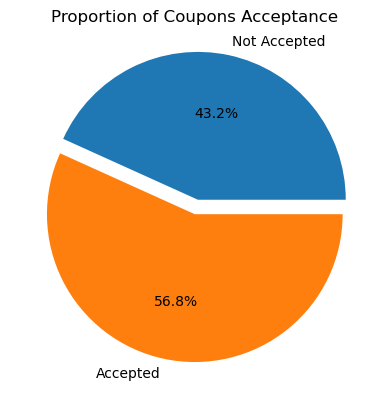

In [582]:
total_pop = data['Y'].count()
proportion = data.groupby('Y')['Y'].count() / total_pop

plt.pie(proportion,explode=(0.1, 0), labels=['Not Accepted', 'Accepted'], autopct='%1.1f%%')
plt.title('Proportion of Coupons Acceptance')
print(f"The proportion of accepted coupons is: {proportion[1]:.2%}")
plt.savefig('plotimages/all_coupon_proportion.png'); 
plt.show()

5. Use a bar plot to visualize the `coupon` column.

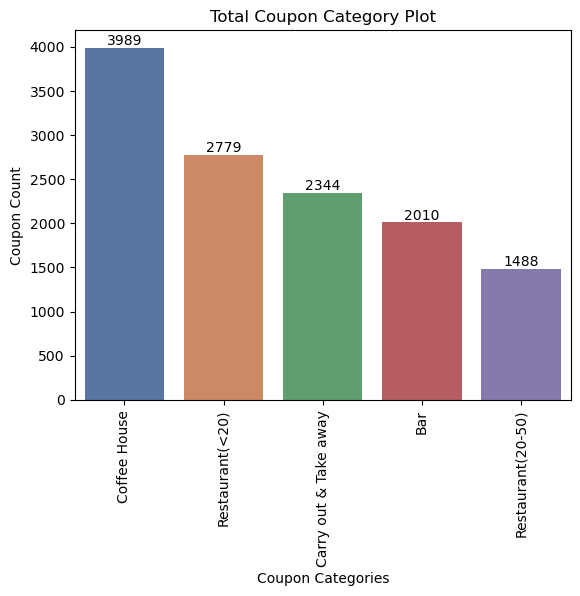

In [583]:
coupon_categories = data['coupon'].value_counts()
coupon_categories
ax = sns.barplot( x=coupon_categories.index, y=coupon_categories.values, hue = coupon_categories.index, palette='deep')
#ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90)
plt.xlabel('Coupon Categories')
plt.ylabel('Coupon Count')
plt.title('Total Coupon Category Plot')

plt.savefig('plotimages/all_coupon_distribution.png')
plt.show()

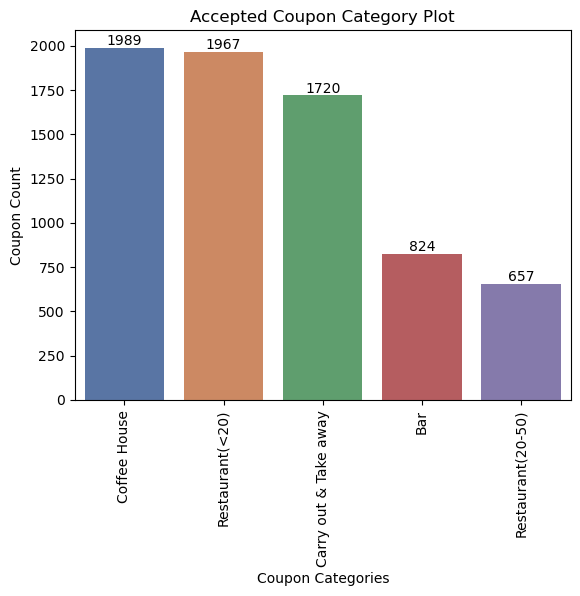

In [584]:
accepeted_coupon_categories = data.loc[data['Y'] == 1]['coupon'].value_counts()
accepeted_coupon_categories
ax = sns.barplot( x=accepeted_coupon_categories.index, y=accepeted_coupon_categories.values,hue = accepeted_coupon_categories.index, palette='deep')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90)
plt.xlabel('Coupon Categories')
plt.ylabel('Coupon Count')
plt.title('Accepted Coupon Category Plot')
plt.savefig('plotimages/accepted_coupon_distribution.png')
plt.show()

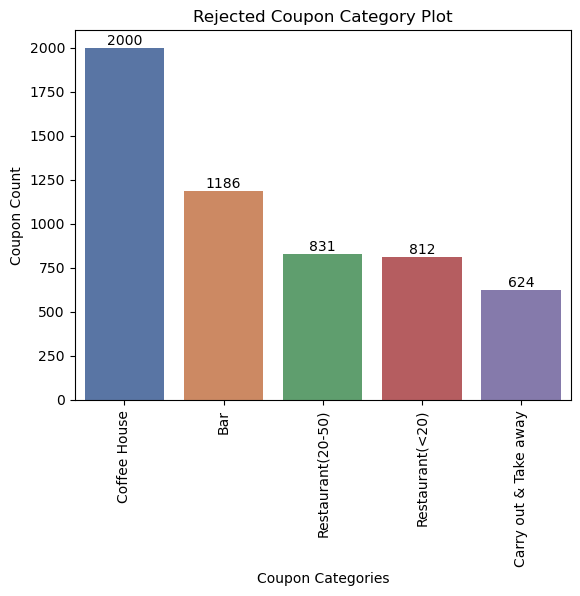

In [585]:
rejected_coupon_categories = data.loc[data['Y'] == 0]['coupon'].value_counts()
rejected_coupon_categories
ax = sns.barplot( x=rejected_coupon_categories.index, y=rejected_coupon_categories.values,hue = rejected_coupon_categories.index, palette='deep')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 90)
plt.xlabel('Coupon Categories')
plt.ylabel('Coupon Count')
plt.title('Rejected Coupon Category Plot')
plt.savefig('plotimages/rejected_coupon_distribution.png')
plt.show()

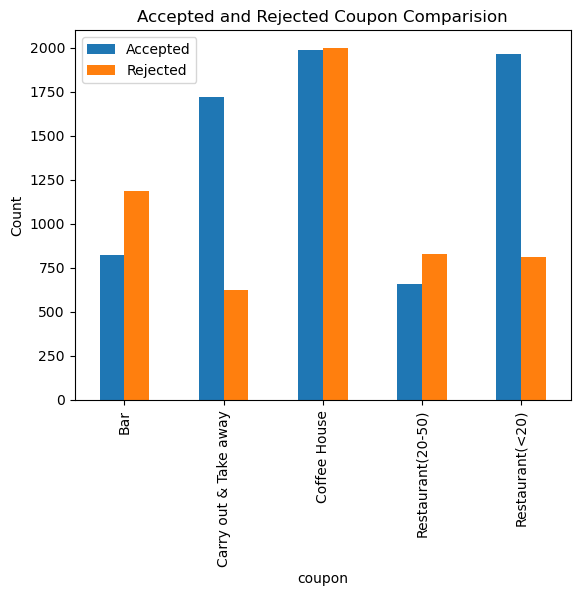

In [586]:
coupons_df = pd.DataFrame({'Accepted': accepeted_coupon_categories.sort_values(), 'Rejected' : rejected_coupon_categories.sort_values()} , index = rejected_coupon_categories.index.sort_values() )
coupons_df
coupons_df.plot.bar(rot=0)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Accepted and Rejected Coupon Comparision')
plt.savefig('plotimages/acc_rej_coupon_comparision.png')
plt.show()

6. Use a histogram to visualize the temperature column.

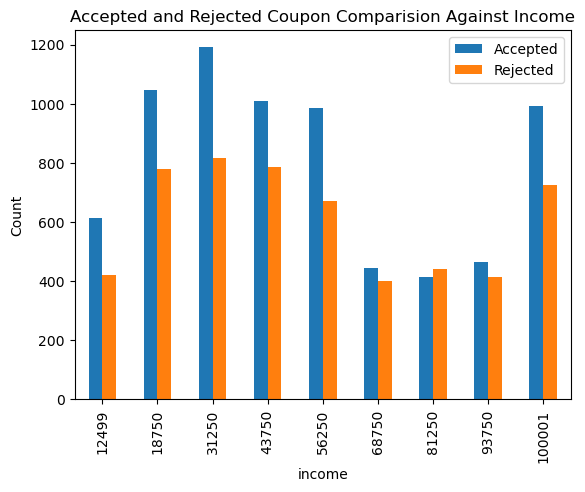

In [587]:
accepeted_income_categories = data.loc[data['Y'] == 1]['income'].value_counts()
accepeted_income_categories = accepeted_income_categories.sort_index()
rejected_income_categories = data.loc[data['Y'] == 0]['income'].value_counts()
rejected_income_categories = rejected_income_categories.sort_index()
income_df = pd.DataFrame({'Accepted': accepeted_income_categories, 'Rejected' : rejected_income_categories} , index = rejected_income_categories.index )

income_df.plot.bar(rot=0)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Accepted and Rejected Coupon Comparision Against Income')
plt.show()

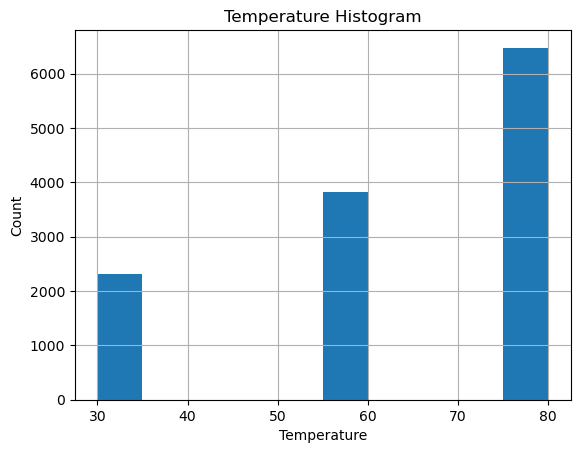

In [589]:
data['temperature'].hist()
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature Histogram')
plt.show()

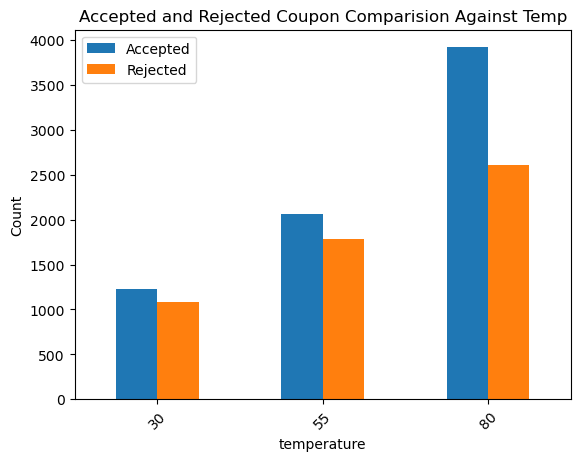

In [590]:
temp_df = pd.DataFrame({'Accepted': accepeted_temp_categories.sort_values(), 'Rejected' : rejected_temp_categories.sort_values()} , index = accepeted_temp_categories.index.sort_values() )
temp_df
temp_df.plot.bar(rot=0)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Accepted and Rejected Coupon Comparision Against Temp')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [591]:
bar_df = data.loc[data['coupon'] == 'Bar']
bar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2010 entries, 9 to 12682
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2010 non-null   object
 1   passanger             2010 non-null   object
 2   weather               2010 non-null   object
 3   temperature           2010 non-null   int64 
 4   time                  2010 non-null   object
 5   coupon                2010 non-null   object
 6   expiration            2010 non-null   int32 
 7   gender                2010 non-null   object
 8   age                   2010 non-null   int32 
 9   maritalStatus         2010 non-null   object
 10  has_children          2010 non-null   int64 
 11  education             2010 non-null   object
 12  occupation            2010 non-null   object
 13  income                2010 non-null   int32 
 14  Bar                   2010 non-null   int32 
 15  CoffeeHouse           2010 non-null   int3

2. What proportion of bar coupons were accepted?


Y
0    0.59005
1    0.40995
Name: Y, dtype: float64

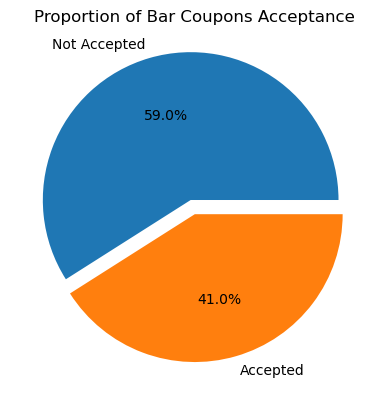

In [592]:
total_bar_coupons = bar_df['Y'].count()
bar_coupons_proportion = bar_df.groupby('Y')['Y'].count() / total_bar_coupons
plt.pie(bar_coupons_proportion,explode=(0.1, 0), labels=['Not Accepted', 'Accepted'], autopct='%1.1f%%')
plt.title('Proportion of Bar Coupons Acceptance')
plt.savefig('plotimages/bar_coupon_proportion.png')
bar_coupons_proportion

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


37.051352843732744
76.88442211055276


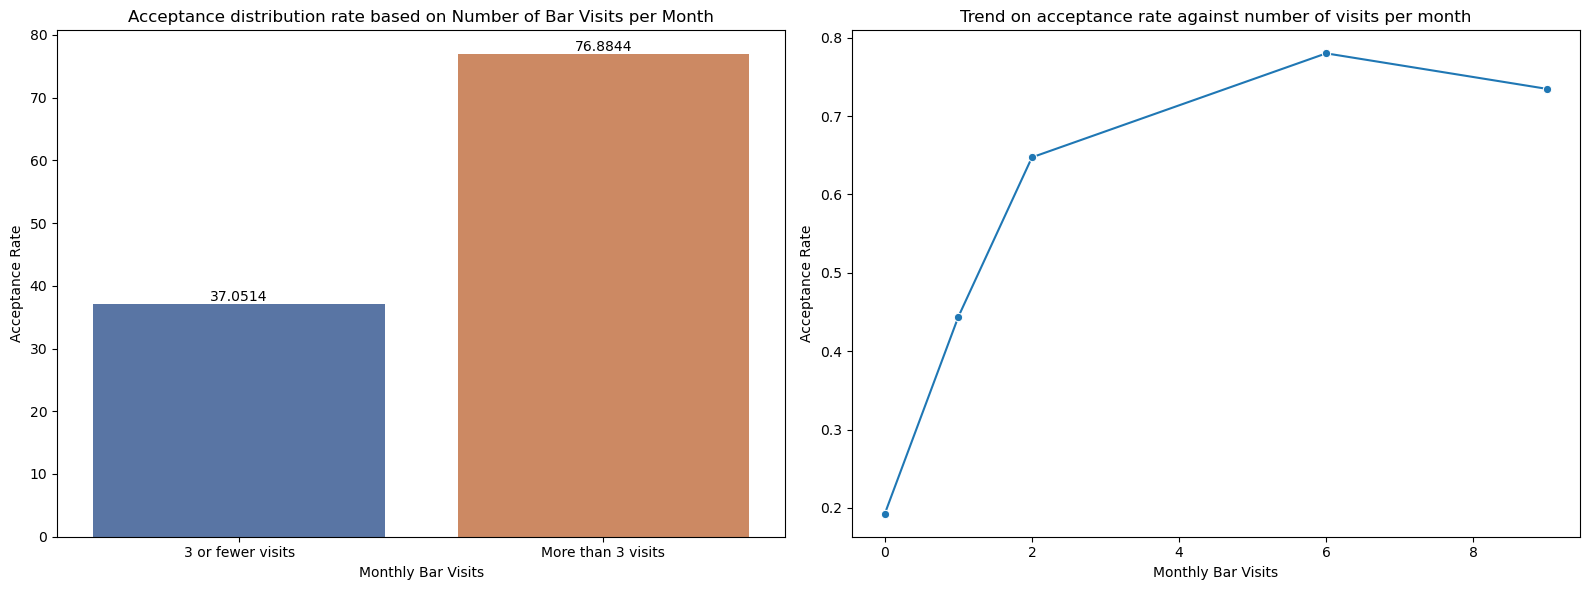

In [593]:
three_or_less_bar = bar_df.loc[bar_df['Bar'] <= 3]
mean_three_or_less_bar = three_or_less_bar['Y'].mean()*100
print(mean_three_or_less_bar)
more_than_3_bar = bar_df.loc[bar_df['Bar'] > 3]
mean_more_than_3_bar = more_than_3_bar['Y'].mean()*100
print(mean_more_than_3_bar)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax = sns.barplot(x=['3 or fewer visits', 'More than 3 visits'], y=[mean_three_or_less_bar,mean_more_than_3_bar], hue= ['3 or fewer visits', 'More than 3 visits'],palette='deep', ax=axes[0])
for i in ax.containers:
    ax.bar_label(i,)
axes[0].set_title('Acceptance distribution rate based on Number of Bar Visits per Month')
axes[0].set_ylabel('Acceptance Rate')
axes[0].set_xlabel('Monthly Bar Visits')
bar_df_grouped = bar_df.groupby('Bar')['Y'].mean().reset_index()
sns.lineplot(data=bar_df_grouped, x='Bar', y='Y', marker='o', ax = axes[1])
axes[1].set_title('Trend on acceptance rate against number of visits per month')
axes[1].set_ylabel('Acceptance Rate')
axes[1].set_xlabel('Monthly Bar Visits')
plt.savefig('plotimages/bar_acceptance_rate_for visit_frequency.png')
plt.tight_layout()
plt.show()

### Findings
    - Overall accpetance rate for Bar coupons is almost double in drivers who vist Bars more than 3 times a month compared to drivers who vist Bars 3 or fewer times a month.
    - Looking at the detailed data for each category, it is evident that acceptance rate of Bar coupons in drivers who visit Bars more than once a month is significantly higer than who vists once or less than a month.
    - There is a slight decrease in acceptance rate for driver's who visit the bar more than 6 times a month. 
    - So, further analysis can be focused on Drivers who visit more than once a month to identify any additional factors affecting the acceptance rate.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [611]:
more_than_1_and_older_than_25 = bar_df.loc[(bar_df['Bar'] > 1) & (bar_df['age'] > 25)] 
more_than_1_and_younger_than_25 = bar_df.loc[(bar_df['Bar'] > 1) & (bar_df['age'] <= 25)] 
more_than_1_and_older_than_25_mean = more_than_1_and_older_than_25['Y'].mean()
more_than_1_and_younger_than_25_mean = more_than_1_and_younger_than_25['Y'].mean()
print(f'Acceptance rate for age <= 25 and bar vists > 1/month - {more_than_1_and_younger_than_25_mean:.2%}')
print(f'Acceptance rate for age > 25 and bar vists > 1/month - {more_than_1_and_older_than_25_mean:.2%}')


Acceptance rate for age <= 25 and bar vists > 1/month - 67.05%
Acceptance rate for age > 25 and bar vists > 1/month - 69.52%


In [595]:
less_than_1_and_older_than_25 = bar_df.loc[(bar_df['Bar'] <= 1) & (bar_df['age'] > 25)] 
less_than_1_and_younger_than_25 = bar_df.loc[(bar_df['Bar'] <= 1) & (bar_df['age'] <= 25)] 
less_than_1_and_older_than_25_mean = less_than_1_and_older_than_25['Y'].mean()
less_than_1_and_younger_than_25_mean = less_than_1_and_younger_than_25['Y'].mean()
print(f'Acceptance rate for age <= 25 and bar vists <= 1/month - {less_than_1_and_younger_than_25_mean:.2%}')
print(f'Acceptance rate for age > 25 and bar vists <= 1/month - {less_than_1_and_older_than_25_mean:.2%}')

Acceptance rate for age <= 25 and bar vists <= 1/month - 39.33%
Acceptance rate for age > 25 and bar vists <= 1/month - 26.24%


### Findings
 - Drivers who visit a Bar more than once a month are significantly more likely to accept a Bar coupon.
 - Though drivers younger then 25 years of age are slightly less likely to accept the Bar coupon, but the difference is very small.
 - #### Drivers who visit a Bar more than once a month are more likely to accept a Bar coupon and age has very less impact on the outcome

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [596]:
more_than_1_visit = bar_df.loc[(bar_df['Bar'] > 1)]
more_than_1_visit.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y,coupon_distance
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,24,Male,21,Single,...,18750,2,1,2,1,2,0,1,1,5
101,Home,Alone,Sunny,55,6PM,Bar,24,Male,21,Single,...,18750,2,1,2,1,2,1,0,1,5
105,Work,Alone,Sunny,55,7AM,Bar,24,Male,21,Single,...,18750,2,1,2,1,2,0,1,0,25
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,24,Male,26,Unmarried partner,...,56250,2,9,6,2,1,0,1,1,5
123,Home,Alone,Sunny,55,6PM,Bar,24,Male,26,Unmarried partner,...,56250,2,9,6,2,1,1,0,1,5


In [597]:
#passanger => ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
more_than_1_visit_with_no_kids = more_than_1_visit.loc[more_than_1_visit['passanger'].isin(['Friend(s)','Partner'])]
more_than_1_visit_with_kids = more_than_1_visit.loc[more_than_1_visit['passanger'].isin(['Kid(s)'])]


In [598]:
more_than_1_visit_with_no_kids_mean = more_than_1_visit_with_no_kids['Y'].mean()
more_than_1_visit_with_kids_mean = more_than_1_visit_with_kids['Y'].mean()
print(f'Acceptance rate for with Kids and bar vists > 1/month - {more_than_1_visit_with_kids_mean:.2%}')
print(f'Acceptance rate for with other than kids and bar vists > 1/month - {more_than_1_visit_with_no_kids_mean:.2%}')

Acceptance rate for with Kids and bar vists > 1/month - 37.78%
Acceptance rate for with other than kids and bar vists > 1/month - 71.79%


In [599]:
more_than_1_visit_with_no_kids_not_farmfishforest_mean = more_than_1_visit_with_no_kids.loc[~more_than_1_visit_with_no_kids['occupation'].isin(['Farming Fishing & Forestry'])]['Y'].mean()
more_than_1_visit_with_with_kids_not_farmfishforest_mean = more_than_1_visit_with_kids.loc[~more_than_1_visit_with_kids['occupation'].isin(['Farming Fishing & Forestry'])]['Y'].mean()
print(f'Acceptance rate by drivers with other than kids not in Farming, Fishing & Forestry: {more_than_1_visit_with_no_kids_not_farmfishforest_mean:.2%}')
print(f'Acceptance rate by drivers with kids not in Farming, Fishing & Forestry: {more_than_1_visit_with_with_kids_not_farmfishforest_mean:.2%}')

Acceptance rate by drivers with other than kids not in Farming, Fishing & Forestry: 71.79%
Acceptance rate by drivers with kids not in Farming, Fishing & Forestry: 37.78%


### Findings
 - There are no drivers who vist Bars more than once a month, and work in 'Farming Fishing & Forestry'
 - Having Kids as passangers significantly affect the likelyhood of drivers accepting Bar coupons. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Acceptance rate for Non-widowed drivers that vitis Bars more than once a month and have passangers other than kids: 71.79%


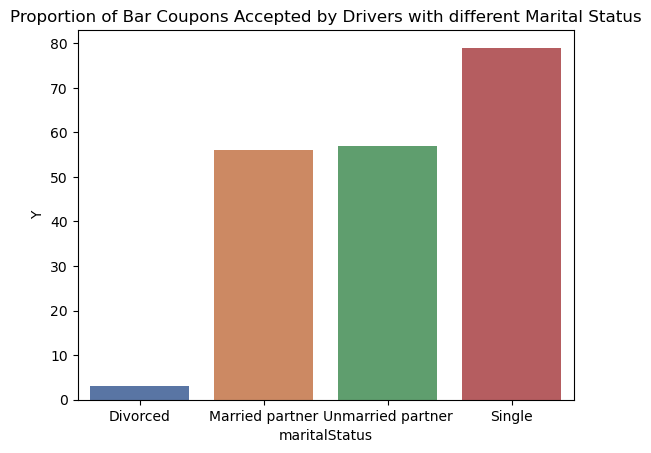

In [600]:
maritalStatus_not_widow_mean = more_than_1_visit_with_no_kids[more_than_1_visit_with_no_kids['maritalStatus'] != 'Widowed']['Y'].mean()
maritalStatus_dist = more_than_1_visit_with_no_kids.groupby('maritalStatus')['Y'].count().sort_values().reset_index()
print(f'Acceptance rate for Non-widowed drivers that vitis Bars more than once a month and have passangers other than kids: {maritalStatus_not_widow_mean:.2%}')
sns.barplot(data = maritalStatus_dist, x = 'maritalStatus', y = 'Y', palette='deep', hue ='maritalStatus')
plt.title('Proportion of Bar Coupons Accepted by Drivers with different Marital Status')
plt.savefig('plotimages/bar_coupon_maritalstatus_proportion.png')

* ##### go to bars more than once a month and are under the age of 30

In [628]:
bar_under_30_mean = more_than_1_visit.loc[more_than_1_visit['age'] < 30 ]['Y'].mean()
print(f"Acceptance rate for under 30 years old Frequent bar visiters: {bar_under_30_mean:.2%}")

Acceptance rate for under 30 years old Frequent bar visiters: 72.17%


* ##### go to cheap restaurants more than 4 times a month and income is less than 50K

In [602]:
bar_less_50k_4plus_cheap_restaurants_mean = bar_df.loc[(bar_df['income'] < 50000) & (bar_df['RestaurantLessThan20'] > 4)]['Y'].mean()

print(f"Acceptance rate for drivers making less than 50K and visiting cheap restaurants more than 4 times a month: {bar_less_50k_4plus_cheap_restaurants_mean:.2%}")

Acceptance rate for drivers making less than 50K and visiting cheap restaurants more than 4 times a month: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

* **Higher Acceptance Among Frequent Bar goers:** There is a strong correlation between the frequency of bar visits and the likelihood of accepting bar coupons.Drivers visiting bars around 6 times a month show the highest acceptance rate. However, there is a slight decrease in acceptance for those visiting more than 6 times a month, suggesting an optimal frequency range for targeting promotions is between 4-6 vists per month.
* **Income and Lifestyle :** Drivers with an income under $50K who frequently dine at cheaper restaurants are moderately receptive to bar coupons. This suggests that income and lifestyle preferences play a role.
* **Age, Company and Social Factors:** A combination of age (such as being under 30) social factors (such as not being a widow) and company (such as not having kids as passengers) significantly boosts coupon acceptance rates. This indicates young drivers that are socially active are highly likely to engage with bar promotions while they are not traveling with Kids.
*  **Weather Factor:** It is observed that during warmer weather likelihood of Coupan accpetance is higer 

Recommendations:
* **Targeted Marketing Efforts:** Focus marketing efforts on individuals who frequent bars 4 to 6 times a month.  
* **Consider accompanying passangers:** Avoid targeting drivers likely to have children as passengers. Instead, target drivers that are likely to be with Friends or Partner to increase acceptance.
* **Lower income group** Consider targeting lower income drivers who frequently visit cheaper restaurants. They have moderate likelihood of accepting Bar coupons.
*  **Warmer Weather** Consider running more campaigns during warmer weather than colder weather


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Findings
 Based on earlier analysis above , the most accpeted coupons are cheap restaurants and Carry out & Take away. 
* Since the **most coupons are offered in the Coffee House category** next analysis will be done on this coupon type. 

In [603]:
coffee_df = data[data['coupon'].str.contains("Coffee")]

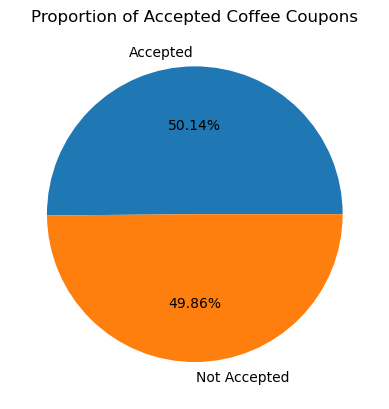

In [609]:
# calculate proportion of accepted coffee house coupons 
plt.pie(coffee_df['Y'].value_counts(),autopct='%.2f%%', labels=['Accepted', 'Not Accepted'])
plt.title('Proportion of Accepted Coffee Coupons');
plt.savefig("plotimages/coffee_coupon_proportion.png")

44.86973303312962
67.5


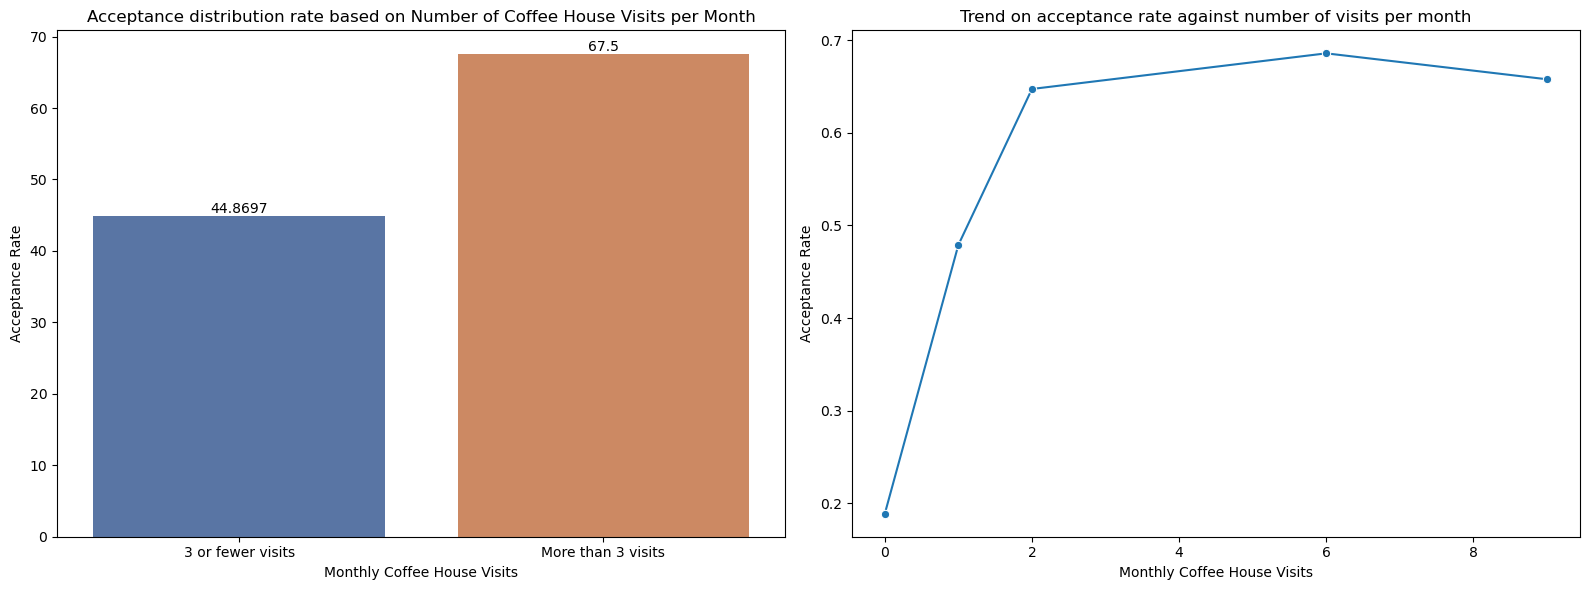

In [610]:
three_or_less_coffee = coffee_df.loc[coffee_df['CoffeeHouse'] <= 3]
mean_three_or_less_coffee = three_or_less_coffee['Y'].mean()*100
print(mean_three_or_less_coffee)
more_than_3_coffee = coffee_df.loc[coffee_df['CoffeeHouse'] > 3]
mean_more_than_3_coffee = more_than_3_coffee['Y'].mean()*100
print(mean_more_than_3_coffee)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax = sns.barplot(x=['3 or fewer visits', 'More than 3 visits'], y=[mean_three_or_less_coffee,mean_more_than_3_coffee], hue= ['3 or fewer visits', 'More than 3 visits'],palette='deep', ax=axes[0])
for i in ax.containers:
    ax.bar_label(i,)
axes[0].set_title('Acceptance distribution rate based on Number of Coffee House Visits per Month')
axes[0].set_ylabel('Acceptance Rate')
axes[0].set_xlabel('Monthly Coffee House Visits')
coffee_df_grouped = coffee_df.groupby('CoffeeHouse')['Y'].mean().reset_index()
sns.lineplot(data=coffee_df_grouped, x='CoffeeHouse', y='Y', marker='o', ax = axes[1])
axes[1].set_title('Trend on acceptance rate against number of visits per month')
axes[1].set_ylabel('Acceptance Rate')
axes[1].set_xlabel('Monthly Coffee House Visits')
plt.savefig('plotimages/coffee_acceptance_rate_for visit_frequency.png')
plt.tight_layout()
plt.show()

Findings
- Overall accpetance rate for Coffee House coupons is significantly higher in drivers who vist Coffee Houses more than 3 times a month compared to drivers who vist COffee Houses 3 or fewer times a month.
- Looking at the detailed data for each category, it is evident that acceptance rate of Coffee House coupons in drivers who visit Coffee Houses more than once a month is significantly higer than who vists once or less than a month.
- There is a slight decrease in acceptance rate for driver's who visit the bar more than 6 times a month. 
- So, further analysis can be focused on Drivers who visit more than once a month to identify any additional factors affecting the acceptance rate.

Compare the acceptance rate between drivers who go to a Caffee House more than once a month and are over the age of 25 to the all others. 

In [613]:
coffee_more_than_1_and_older_than_25 = coffee_df.loc[(coffee_df['CoffeeHouse'] > 1) & (coffee_df['age'] > 25)] 
coffee_more_than_1_and_younger_than_25 = coffee_df.loc[(coffee_df['CoffeeHouse'] > 1) & (coffee_df['age'] <= 25)] 
coffee_more_than_1_and_older_than_25_mean = coffee_more_than_1_and_older_than_25['Y'].mean()
coffee_more_than_1_and_younger_than_25_mean = coffee_more_than_1_and_younger_than_25['Y'].mean()
print(f'Acceptance rate for age <= 25 and Coffee House vists > 1/month - {coffee_more_than_1_and_younger_than_25_mean:.2%}')
print(f'Acceptance rate for age > 25 and Coffee House vists > 1/month - {coffee_more_than_1_and_older_than_25_mean:.2%}')

Acceptance rate for age <= 25 and bar vists > 1/month - 71.28%
Acceptance rate for age > 25 and bar vists > 1/month - 63.81%


In [615]:
coffee_less_than_1_and_older_than_25 = coffee_df.loc[(coffee_df['CoffeeHouse'] <= 1) & (coffee_df['age'] > 25)] 
coffee_less_than_1_and_younger_than_25 = coffee_df.loc[(coffee_df['CoffeeHouse'] <= 1) & (coffee_df['age'] <= 25)] 
coffee_less_than_1_and_older_than_25_mean = coffee_less_than_1_and_older_than_25['Y'].mean()
coffee_less_than_1_and_younger_than_25_mean = coffee_less_than_1_and_younger_than_25['Y'].mean()
print(f'Acceptance rate for age <= 25 and Coffee House vists <= 1/month - {coffee_less_than_1_and_younger_than_25_mean:.2%}')
print(f'Acceptance rate for age > 25 and Coffee House vists <= 1/month - {coffee_less_than_1_and_older_than_25_mean:.2%}')

Acceptance rate for age <= 25 and Coffee House vists <= 1/month - 35.65%
Acceptance rate for age > 25 and Coffee House vists <= 1/month - 34.69%


### Findings
 - Drivers who visit a Coffee Houses more than once a month are significantly more likely to accept a Coffee House coupon.
 - Though drivers older then 25 years of age are slightly less likely to accept the Coffee House coupon, but the difference is very small.
 - #### Drivers who visit a Coffee House more than once a month are more likely to accept a Coffee House coupon and age has very less impact on the outcome

In [616]:
coffee_more_than_1_visit = coffee_df.loc[(coffee_df['CoffeeHouse'] > 1)]
coffee_more_than_1_visit.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y,coupon_distance
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2,Male,46,Single,...,18750,0,6,2,2,0,0,1,1,5
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Male,46,Single,...,18750,0,6,2,2,0,0,1,1,5
49,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2,Male,46,Single,...,18750,0,6,2,2,0,0,1,1,15
50,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Male,46,Single,...,18750,0,6,2,2,0,0,1,0,15
52,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2,Male,46,Single,...,18750,0,6,2,2,0,0,1,0,5


In [617]:
#passanger => ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
coffee_more_than_1_visit_with_no_kids = coffee_more_than_1_visit.loc[coffee_more_than_1_visit['passanger'].isin(['Friend(s)','Partner'])]
coffee_more_than_1_visit_with_kids = coffee_more_than_1_visit.loc[coffee_more_than_1_visit['passanger'].isin(['Kid(s)'])]

In [618]:
coffee_more_than_1_visit_with_no_kids_mean = coffee_more_than_1_visit_with_no_kids['Y'].mean()
coffee_more_than_1_visit_with_kids_mean = coffee_more_than_1_visit_with_kids['Y'].mean()
print(f'Acceptance rate for with Kids and Coffee House vists > 1/month - {coffee_more_than_1_visit_with_kids_mean:.2%}')
print(f'Acceptance rate for with other than kids and Coffee House vists > 1/month - {coffee_more_than_1_visit_with_no_kids_mean:.2%}')

Acceptance rate for with Kids and Coffee House vists > 1/month - 64.81%
Acceptance rate for with other than kids and Coffee House vists > 1/month - 76.63%


In [622]:
coffee_more_than_1_visit_with_no_kids_not_farmfishforest_mean = coffee_more_than_1_visit_with_no_kids.loc[~coffee_more_than_1_visit_with_no_kids['occupation'].isin(['Farming Fishing & Forestry'])]['Y'].mean()
coffee_more_than_1_visit_with_with_kids_not_farmfishforest_mean = coffee_more_than_1_visit_with_kids.loc[~coffee_more_than_1_visit_with_kids['occupation'].isin(['Farming Fishing & Forestry'])]['Y'].mean()
print(f'Acceptance rate by drivers with other than kids not in Farming, Fishing & Forestry: {coffee_more_than_1_visit_with_no_kids_not_farmfishforest_mean:.2%}')
print(f'Acceptance rate by drivers with kids not in Farming, Fishing & Forestry: {coffee_more_than_1_visit_with_with_kids_not_farmfishforest_mean:.2%}')

Acceptance rate by drivers with other than kids not in Farming, Fishing & Forestry: 76.63%
Acceptance rate by drivers with kids not in Farming, Fishing & Forestry: 64.81%


### Findings
 - There are no drivers who vist Coffee Houses more than once a month, and work in 'Farming Fishing & Forestry'
 - Tyoe of passange has a very moderate effect on the likelyhood of drivers accepting Coffee House coupons. 

Acceptance rate for Non-widowed drivers that visits Coffee Houses more than once a month and have passangers other than kids: 76.63%


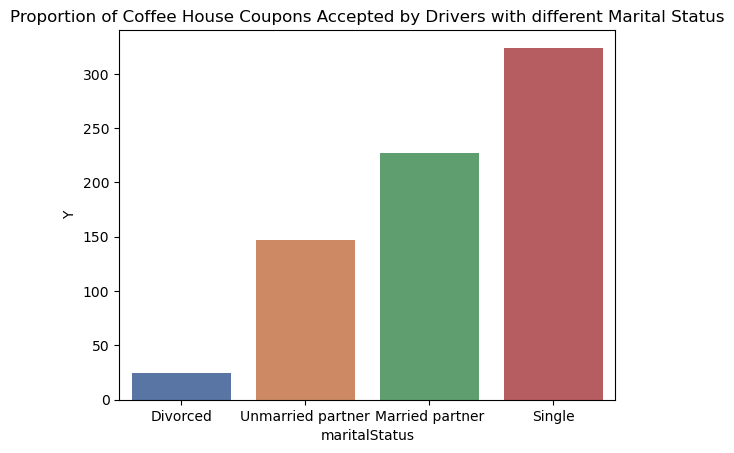

In [626]:
coffee_maritalStatus_not_widow_mean = coffee_more_than_1_visit_with_no_kids[coffee_more_than_1_visit_with_no_kids['maritalStatus'] != 'Widowed']['Y'].mean()
coffee_maritalStatus_dist = coffee_more_than_1_visit_with_no_kids.groupby('maritalStatus')['Y'].count().sort_values().reset_index()
print(f'Acceptance rate for Non-widowed drivers that visits Coffee Houses more than once a month and have passangers other than kids: {coffee_maritalStatus_not_widow_mean:.2%}')
sns.barplot(data = coffee_maritalStatus_dist, x = 'maritalStatus', y = 'Y', palette='deep', hue ='maritalStatus')
plt.title('Proportion of Coffee House Coupons Accepted by Drivers with different Marital Status')
plt.savefig('plotimages/coffee_coupon_maritalstatus_proportion.png')

In [632]:
coffee_under_30_mean = coffee_more_than_1_visit.loc[coffee_more_than_1_visit['age'] < 30 ]['Y'].mean()
print(f"Acceptance rate for under 30 years old Frequent Coffee House visiters: {coffee_under_30_mean:.2%}")

Acceptance rate for under 30 years old Frequent Coffee House visiters: 68.93%


In [629]:
coffee_less_50k_4plus_cheap_restaurants_mean = coffee_df.loc[(coffee_df['income'] < 50000) & (coffee_df['RestaurantLessThan20'] > 4)]['Y'].mean()

print(f"Acceptance rate for drivers making less than 50K and visiting cheap restaurants more than 4 times a month: {coffee_less_50k_4plus_cheap_restaurants_mean:.2%}")

Acceptance rate for drivers making less than 50K and visiting cheap restaurants more than 4 times a month: 54.30%


#### Hypothesis
* **Higher Acceptance Among Frequent Coffee House goers:** There is a strong correlation between the frequency of coffee House visits and the likelihood of drivers accepting Coffee House coupons.Drivers visiting Coffee House around 6 times a month show the highest acceptance rate. However, there is a slight decrease in acceptance for those visiting more than 6 times a month, suggesting an optimal frequency range for targeting promotions is between 4-6 vists per month. This is similar to Bar goers accepting Bar Coupons.
* **Income and Lifestyle :** Drivers with an income under $50K who frequently dine at cheaper restaurants are moderately receptive to Coffee House coupons. This suggests that income and lifestyle preferences play a role.
* **Age, Company and Social Factors:** A combination of age (such as being under 30) social factors (such as not being a widow) boosts coupon acceptance rates. Even though type of accompaning passangers has a vey less impact on the liklihood of Coffee House coupon acceptance.This indicates young drivers that are socially active are highly likely to engage with Coffee House promotions and accompanying passanger type has no significant impact.
*  **Weather Factor:** It is observed that during warmer weather likelihood of Coupan accpetance is higher for any type of coupons.

Recommendations:
* **Targeted Marketing Efforts:** Focus marketing efforts on individuals who frequent Coffee Houses 4 to 6 times a month.  
* **Lower income group** Consider targeting lower income drivers who frequently visit cheaper restaurants. They have moderate likelihood of accepting Coffee House coupons.
*  **Warmer Weather** Consider running more campaigns during warmer weather than colder weather